In [3]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.random.set_seed(10)
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
# Load the dataset
dataset, dataset_info = tfds.load(name='malaria', shuffle_files=True, with_info=True, as_supervised=True, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])

In [4]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize images to 224x224
    image = tf.cast(image, tf.float32)  # Convert images to float32
    return image, label

# Apply preprocessing
train_dataset, valid_dataset, test_dataset = dataset

train_dataset = train_dataset.map(preprocess)
valid_dataset = valid_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

# Normalization function
def normalise(image, label):
    return image / 255.0, label

# Apply normalization
train_dataset = train_dataset.map(normalise)
valid_dataset = valid_dataset.map(normalise)
test_dataset = test_dataset.map(normalise)

# Apply shuffling, batching, and prefetching
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Dropout 
# Regurlarization

In [10]:
from keras.layers import Conv2D,MaxPool2D,Dense,InputLayer,Flatten,BatchNormalization,Dropout
from keras.regularizers import L2
dropout_ratio = 0.2
model = keras.Sequential([
    InputLayer(shape= (224,224,3)),
    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid',activation='relu',kernel_regularizer=L2()),
    BatchNormalization(),
    MaxPool2D(strides=2),
    
    Conv2D(filters=18, kernel_size=3, strides=1, padding='valid',activation='relu',kernel_regularizer=L2()),
    BatchNormalization(),
    MaxPool2D(strides=2),

    Conv2D(filters=36, kernel_size=3, strides=1, padding='valid',activation='relu',kernel_regularizer=L2()),
    BatchNormalization(),
    MaxPool2D(strides=2),
    
    Conv2D(filters=48, kernel_size=3, strides=1, padding='valid',activation='relu',kernel_regularizer=L2()),
    BatchNormalization(),
    MaxPool2D(strides=2),
    
    Flatten(),
    
    Dense(1020,activation='relu',kernel_regularizer=L2()),
    Dropout(rate =dropout_ratio),
    Dense(680,activation='relu',kernel_regularizer=L2()),
    Dropout(rate =dropout_ratio),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 18)   │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 109, 109, 18)   │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 36)     │         5,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 52, 52, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 48)     │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 24, 24, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1020)           │     7,051,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1020)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 680)            │       694,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 680)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           681 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,769,279 (29.64 MB)

 Trainable params: 7,769,063 (29.64 MB)

 Non-trainable params: 216 (864.00 B)

In [11]:
# Model Compilation
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset,validation_data=valid_dataset,epochs=10)

Epoch 1/10


2024-09-01 13:01:06.520457: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28200960 exceeds 10% of free system memory.
2024-09-01 13:01:08.148541: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-09-01 13:01:08.166800: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
I0000 00:00:1725195668.174421    3794 service.cc:146] XLA service 0x7f2a90015320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725195668.174471    3794 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-09-01 13:01:08.306166: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-01 13:01:08.866639: I external/local_xla/xla/stream_exe

  2/689 ━━━━━━━━━━━━━━━━━━━━ 1:06 97ms/step - accuracy: 0.5859 - loss: 27.7998  

I0000 00:00:1725195676.481431    3794 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-09-01 13:01:16.587412: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-09-01 13:01:16.676009: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8443 - loss: 10.8478

2024-09-01 13:01:54.166264: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 160 bytes spill stores, 160 bytes spill loads

2024-09-01 13:01:54.195105: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 40 bytes spill stores, 40 bytes spill loads



689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.8444 - loss: 10.8394 - val_accuracy: 0.9401 - val_loss: 0.9763
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.9487 - loss: 0.7474 - val_accuracy: 0.9525 - val_loss: 0.4162
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.9529 - loss: 0.3762 - val_accuracy: 0.9419 - val_loss: 0.3399
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 95s 137ms/step - accuracy: 0.9547 - loss: 0.2912 - val_accuracy: 0.9256 - val_loss: 0.3666
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 95s 138ms/step - accuracy: 0.9529 - loss: 0.2668 - val_accuracy: 0.9539 - val_loss: 0.2586
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 95s 138ms/step - accuracy: 0.9547 - loss: 0.2573 - val_accuracy: 0.9554 - val_loss: 0.2558
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 96s 139ms/step - accuracy: 0.9542 - loss: 0.2421 - val_accuracy: 0.9452 - val_loss: 0.2703
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 95s 138ms/step - accuracy: 0.9546 - loss: 0.2299 - val_a

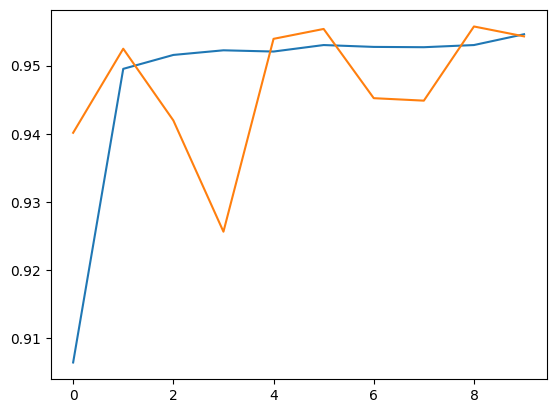

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])